<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Option_Greeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
EPS = np.finfo(np.float64).eps

In [3]:
h_so = EPS ** (1/4)
h_fo = EPS ** (1/3)

In [4]:
K = 100 # Strike Price
r = 0.04
q = 0.03
tau = 6/12
sigma = 0.30

In [5]:
def black_scholes(K, r, q, tau, sigma, epsilon = 0):
    bs_df = pd.DataFrame({
        'S' : np.linspace(start = 50, stop = 150, num = 1000 + 1, endpoint = True)
    })

    bs_df.eval('S_offset = S + @epsilon', inplace = True)
    bs_df.eval('temp = log(S_offset) - log(@K) + (@r - @q) * @tau', inplace = True)
    bs_df.eval('d_plus_num = temp + 0.5 * @tau * @sigma ** 2', inplace = True)
    bs_df.eval('d_minus_num = temp - 0.5 * @tau * @sigma ** 2', inplace = True)
    bs_df.eval('d_den = @sigma * sqrt(@tau)', inplace = True)
    bs_df.eval('d_plus = d_plus_num / d_den', inplace = True)
    bs_df.eval('d_minus = d_minus_num / d_den', inplace = True)
    bs_df['cdf_norm_d_plus'] = norm.cdf(bs_df['d_plus'])
    bs_df['cdf_norm_d_minus'] = norm.cdf(bs_df['d_minus'])
    bs_df['cdf_norm_neg_d_plus'] = norm.cdf(-bs_df['d_plus'])
    bs_df['cdf_norm_neg_d_minus'] = norm.cdf(-bs_df['d_minus'])
    bs_df.eval('call = S_offset * exp(-@q * @tau) * cdf_norm_d_plus - @K * exp(-@r * @tau) * cdf_norm_d_minus', inplace = True)
    bs_df.eval('put = @K * exp(-@r * @tau) * cdf_norm_neg_d_minus - S_offset * exp(-@q * @tau) * cdf_norm_neg_d_plus', inplace = True)

    return bs_df

In [6]:
def plot_call_vol(K, r, q, tau):
    greek_1_df = black_scholes(K, r, q, tau, 0.10, 0)
    greek_2_df = black_scholes(K, r, q, tau, 0.15, 0)
    greek_3_df = black_scholes(K, r, q, tau, 0.20, 0)
    greek_4_df = black_scholes(K, r, q, tau, 0.25, 0)
    greek_5_df = black_scholes(K, r, q, tau, 0.30, 0)
    greek_6_df = black_scholes(K, r, q, tau, 0.35, 0)

    sns.lineplot(x = 'S', y = 'call', data = greek_1_df, color = 'red', label = 'vol 0.10 Call')
    sns.lineplot(x = 'S', y = 'call', data = greek_2_df, color = 'orange', label = 'vol 0.15 Call')
    sns.lineplot(x = 'S', y = 'call', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Call')
    sns.lineplot(x = 'S', y = 'call', data = greek_4_df, color = 'green', label = 'vol 0.25 Call')
    sns.lineplot(x = 'S', y = 'call', data = greek_5_df, color = 'blue', label = 'vol 0.30 Call')
    sns.lineplot(x = 'S', y = 'call', data = greek_6_df, color = 'violet', label = 'vol 0.35 Call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)
    plt.xlabel('Spot Price')
    plt.ylabel('Call Premium')

In [7]:
def plot_put_vol(K, r, q, tau):
    greek_1_df = black_scholes(K, r, q, tau, 0.10, 0)
    greek_2_df = black_scholes(K, r, q, tau, 0.15, 0)
    greek_3_df = black_scholes(K, r, q, tau, 0.20, 0)
    greek_4_df = black_scholes(K, r, q, tau, 0.25, 0)
    greek_5_df = black_scholes(K, r, q, tau, 0.30, 0)
    greek_6_df = black_scholes(K, r, q, tau, 0.35, 0)

    sns.lineplot(x = 'S', y = 'put', data = greek_1_df, color = 'red', label = 'vol 0.10 Put')
    sns.lineplot(x = 'S', y = 'put', data = greek_2_df, color = 'orange', label = 'vol 0.15 Put')
    sns.lineplot(x = 'S', y = 'put', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Put')
    sns.lineplot(x = 'S', y = 'put', data = greek_4_df, color = 'green', label = 'vol 0.25 Put')
    sns.lineplot(x = 'S', y = 'put', data = greek_5_df, color = 'blue', label = 'vol 0.30 Put')
    sns.lineplot(x = 'S', y = 'put', data = greek_6_df, color = 'violet', label = 'vol 0.35 Put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)
    plt.xlabel('Spot Price')
    plt.ylabel('Put Premium')

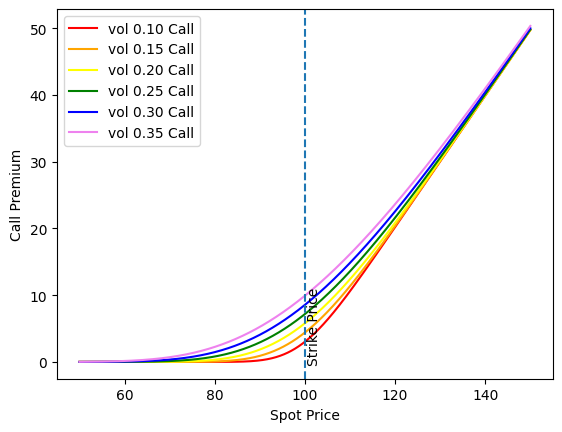

In [8]:
plot_call_vol(K, r, q, tau)

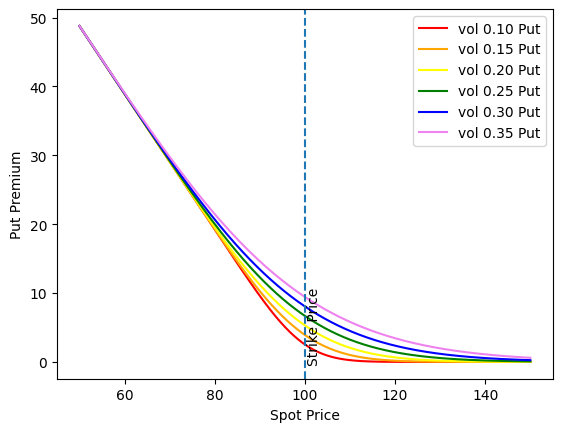

In [9]:
plot_put_vol(K, r, q, tau)

In [10]:
def greek_delta_call(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau, sigma, epsilon = h)
    bs_left_df = black_scholes(K, r, q, tau, sigma, epsilon = -h)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['call'],
        'V_right' : bs_right_df['call'],
        'V_left' : bs_left_df['call']
    })

    greeks_df.eval('Delta = (V_right - V_left)/ (2 * @h)', inplace = True)

    return greeks_df

In [11]:
def greek_delta_put(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau, sigma, epsilon = h)
    bs_left_df = black_scholes(K, r, q, tau, sigma, epsilon = -h)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['put'],
        'V_right' : bs_right_df['put'],
        'V_left' : bs_left_df['put']
    })

    greeks_df.eval('Delta = (V_right - V_left)/ (2 * @h)', inplace = True)

    return greeks_df

In [12]:
def plot_call_delta_vol(K, r, q, tau, h):
    greek_1_df = greek_delta_call(K, r, q, tau, 0.10, h)
    greek_2_df = greek_delta_call(K, r, q, tau, 0.15, h)
    greek_3_df = greek_delta_call(K, r, q, tau, 0.20, h)
    greek_4_df = greek_delta_call(K, r, q, tau, 0.25, h)
    greek_5_df = greek_delta_call(K, r, q, tau, 0.30, h)
    greek_6_df = greek_delta_call(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_1_df, color = 'red', label = 'vol 0.10 Call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_2_df, color = 'orange', label = 'vol 0.15 Call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_4_df, color = 'green', label = 'vol 0.25 Call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_5_df, color = 'blue', label = 'vol 0.30 Call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_6_df, color = 'violet', label = 'vol 0.35 Call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [13]:
def plot_put_delta_vol(K, r, q, tau, h):
    greek_1_df = greek_delta_put(K, r, q, tau, 0.10, h)
    greek_2_df = greek_delta_put(K, r, q, tau, 0.15, h)
    greek_3_df = greek_delta_put(K, r, q, tau, 0.20, h)
    greek_4_df = greek_delta_put(K, r, q, tau, 0.25, h)
    greek_5_df = greek_delta_put(K, r, q, tau, 0.30, h)
    greek_6_df = greek_delta_put(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_1_df, color = 'red', label = 'vol 0.10 Put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_2_df, color = 'orange', label = 'vol 0.15 Put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_4_df, color = 'green', label = 'vol 0.25 Put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_5_df, color = 'blue', label = 'vol 0.30 Put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_6_df, color = 'violet', label = 'vol 0.35 Put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

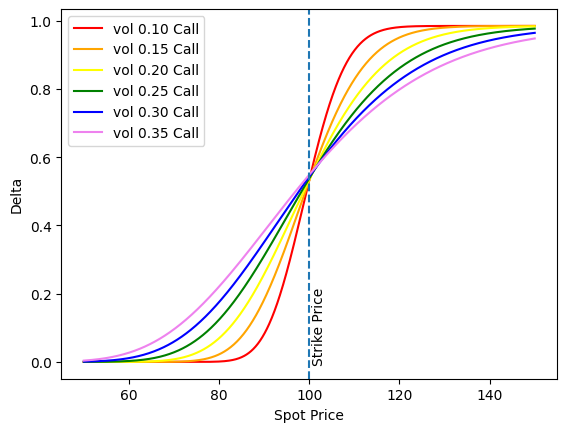

In [14]:
plot_call_delta_vol(K, r, q, tau, h_fo)

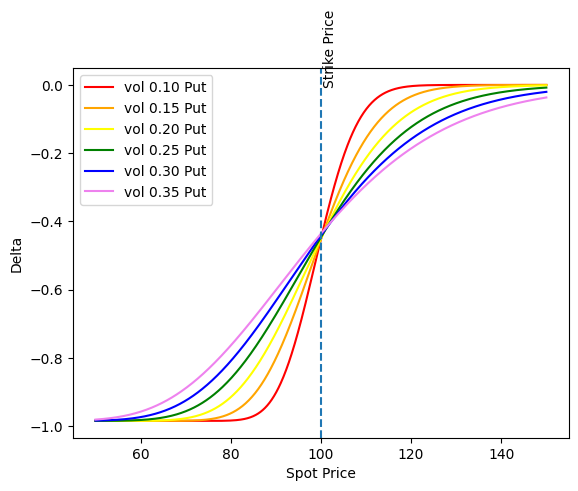

In [15]:
plot_put_delta_vol(K, r, q, tau, h_fo)

In [16]:
def plot_call_delta_tau(K, r, q, sigma, h):
    greek_1_df = greek_delta_call(K, r, q, 1/12, sigma, h)
    greek_2_df = greek_delta_call(K, r, q, 2/12, sigma, h)
    greek_3_df = greek_delta_call(K, r, q, 3/12, sigma, h)
    greek_4_df = greek_delta_call(K, r, q, 4/12, sigma, h)
    greek_5_df = greek_delta_call(K, r, q, 5/12, sigma, h)
    greek_6_df = greek_delta_call(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_1_df, color = 'red', label = '1 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_2_df, color = 'orange', label = '2 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_3_df, color = 'yellow', label = '3 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_4_df, color = 'green', label = '4 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_5_df, color = 'blue', label = '5 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_6_df, color = 'violet', label = '6 month to expire call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [17]:
def plot_put_delta_tau(K, r, q, sigma, h):
    greek_1_df = greek_delta_put(K, r, q, 1/12, sigma, h)
    greek_2_df = greek_delta_put(K, r, q, 2/12, sigma, h)
    greek_3_df = greek_delta_put(K, r, q, 3/12, sigma, h)
    greek_4_df = greek_delta_put(K, r, q, 4/12, sigma, h)
    greek_5_df = greek_delta_put(K, r, q, 5/12, sigma, h)
    greek_6_df = greek_delta_put(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_1_df, color = 'red', label = '1 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_2_df, color = 'orange', label = '2 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_3_df, color = 'yellow', label = '3 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_4_df, color = 'green', label = '4 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_5_df, color = 'blue', label = '5 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Delta', data = greek_6_df, color = 'violet', label = '6 month to expire put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

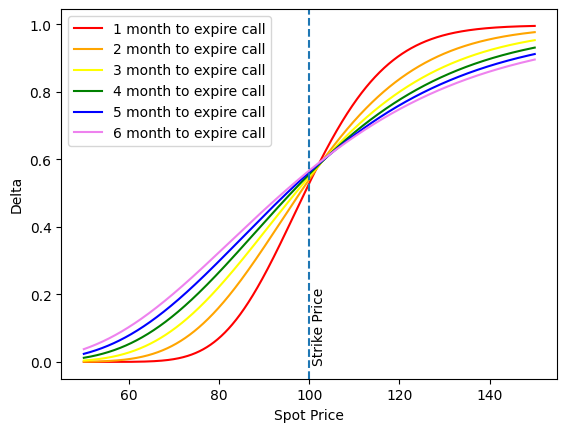

In [18]:
plot_call_delta_tau(K, r, q, tau, h_fo)

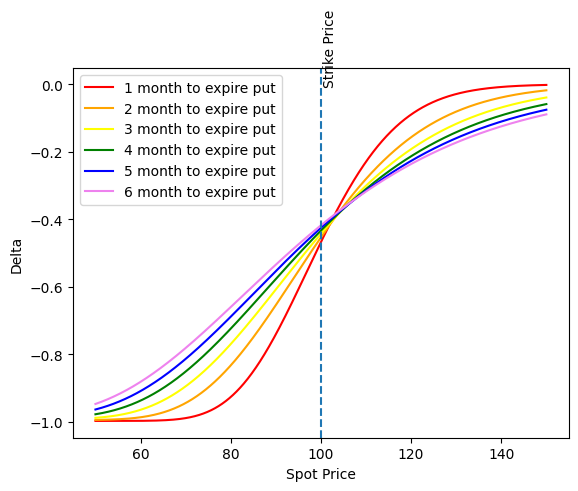

In [19]:
plot_put_delta_tau(K, r, q, tau, h_fo)

In [20]:
def greek_gamma_call(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau, sigma, epsilon = h)
    bs_left_df = black_scholes(K, r, q, tau, sigma, epsilon = -h)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['call'],
        'V_right' : bs_right_df['call'],
        'V_left' : bs_left_df['call']
    })

    greeks_df.eval('Gamma = (V_right - 2 * V + V_left)/ (@h ** 2)', inplace = True)

    return greeks_df

In [21]:
def greek_gamma_put(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau, sigma, epsilon = h)
    bs_left_df = black_scholes(K, r, q, tau, sigma, epsilon = -h)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['put'],
        'V_right' : bs_right_df['put'],
        'V_left' : bs_left_df['put']
    })

    greeks_df.eval('Gamma = (V_right - 2 * V + V_left)/ (@h ** 2)', inplace = True)

    return greeks_df

In [22]:
def plot_call_gamma_vol(K, r, q, tau, h):
    greeks_1_df = greek_gamma_call(K, r, q, tau, 0.10, h)
    greeks_2_df = greek_gamma_call(K, r, q, tau, 0.15, h)
    greeks_3_df = greek_gamma_call(K, r, q, tau, 0.20, h)
    greeks_4_df = greek_gamma_call(K, r, q, tau, 0.25, h)
    greeks_5_df = greek_gamma_call(K, r, q, tau, 0.30, h)
    greeks_6_df = greek_gamma_call(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_1_df, color = 'red', label = 'vol 0.10 Call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_2_df, color = 'orange', label = 'vol 0.15 Call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_3_df, color = 'yellow', label = 'vol 0.20 Call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_4_df, color = 'green', label = 'vol 0.25 Call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_5_df, color = 'blue', label = 'vol 0.30 Call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_6_df, color = 'violet', label = 'vol 0.35 Call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [23]:
def plot_put_gamma_vol(K, r, q, tau, h):
    greeks_1_df = greek_gamma_put(K, r, q, tau, 0.10, h)
    greeks_2_df = greek_gamma_put(K, r, q, tau, 0.15, h)
    greeks_3_df = greek_gamma_put(K, r, q, tau, 0.20, h)
    greeks_4_df = greek_gamma_put(K, r, q, tau, 0.25, h)
    greeks_5_df = greek_gamma_put(K, r, q, tau, 0.30, h)
    greeks_6_df = greek_gamma_put(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_1_df, color = 'red', label = 'vol 0.10 Put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_2_df, color = 'orange', label = 'vol 0.15 Put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_3_df, color = 'yellow', label = 'vol 0.20 Put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_4_df, color = 'green', label = 'vol 0.25 Put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_5_df, color = 'blue', label = 'vol 0.30 Put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = greeks_6_df, color = 'violet', label = 'vol 0.35 Put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [24]:
def plot_call_gamma_tau(K, r, q, sigma, h):
    gamma_1_vol_df = greek_gamma_call(K, r, q, 1/12, sigma, h)
    gamma_2_vol_df = greek_gamma_call(K, r, q, 2/12, sigma, h)
    gamma_3_vol_df = greek_gamma_call(K, r, q, 3/12, sigma, h)
    gamma_4_vol_df = greek_gamma_call(K, r, q, 4/12, sigma, h)
    gamma_5_vol_df = greek_gamma_call(K, r, q, 5/12, sigma, h)
    gamma_6_vol_df = greek_gamma_call(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_1_vol_df, color = 'red', label = '1 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_2_vol_df, color = 'orange', label = '2 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_3_vol_df, color = 'yellow', label = '3 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_4_vol_df, color = 'green', label = '4 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_5_vol_df, color = 'blue', label = '5 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_6_vol_df, color = 'violet', label = '6 month to expire call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [25]:
def plot_put_gamma_tau(K, r, q, sigma, h):
    gamma_1_vol_df = greek_gamma_put(K, r, q, 1/12, sigma, h)
    gamma_2_vol_df = greek_gamma_put(K, r, q, 2/12, sigma, h)
    gamma_3_vol_df = greek_gamma_put(K, r, q, 3/12, sigma, h)
    gamma_4_vol_df = greek_gamma_put(K, r, q, 4/12, sigma, h)
    gamma_5_vol_df = greek_gamma_put(K, r, q, 5/12, sigma, h)
    gamma_6_vol_df = greek_gamma_put(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_1_vol_df, color = 'red', label = '1 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_2_vol_df, color = 'orange', label = '2 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_3_vol_df, color = 'yellow', label = '3 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_4_vol_df, color = 'green', label = '4 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_5_vol_df, color = 'blue', label = '5 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Gamma', data = gamma_6_vol_df, color = 'violet', label = '6 month to expire put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

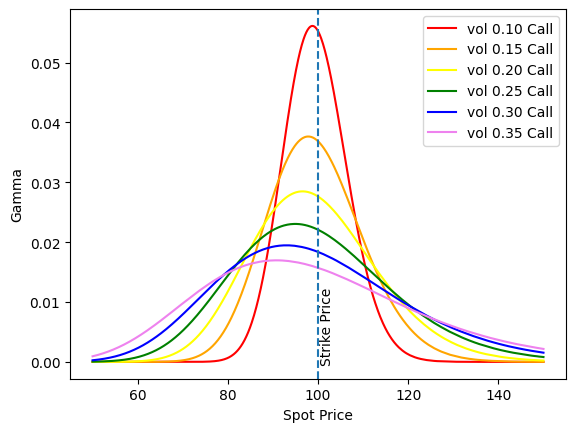

In [26]:
plot_call_gamma_vol(K, r, q, tau, h_so)

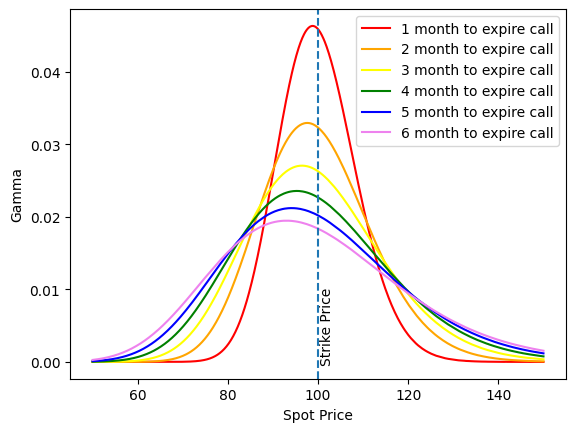

In [27]:
plot_call_gamma_tau(K, r, q, sigma, h_so)

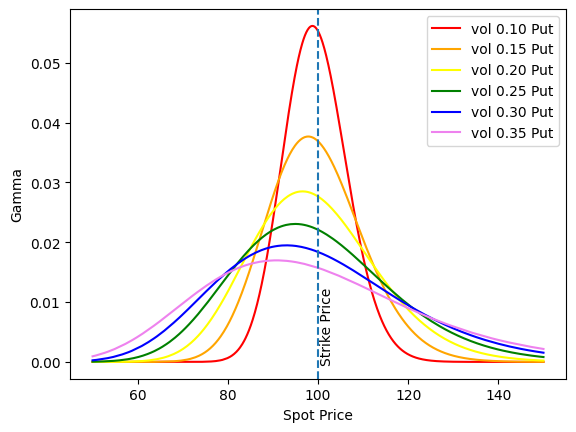

In [28]:
plot_put_gamma_vol(K, r, q, tau, h_so)

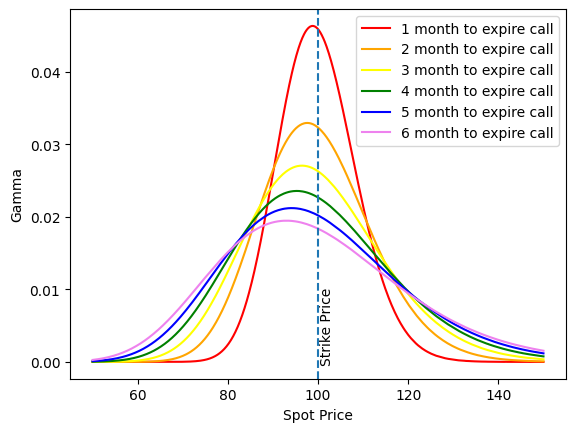

In [29]:
plot_call_gamma_tau(K, r, q, sigma, h_so)

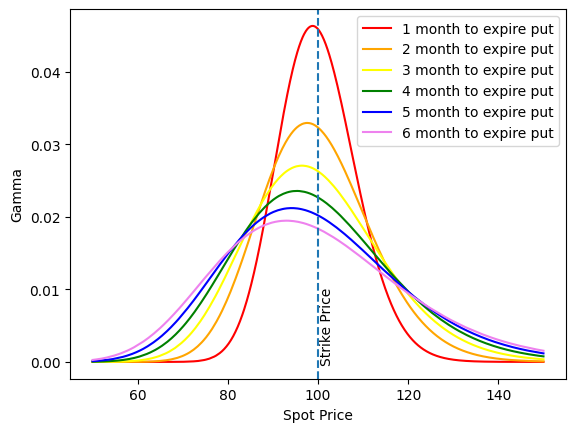

In [30]:
plot_put_gamma_tau(K, r, q, sigma, h_so)

In [31]:
def greek_theta_call(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau + h, sigma, epsilon = 0)
    bs_left_df = black_scholes(K, r, q, tau - h, sigma, epsilon = 0)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['call'],
        'V_right' : bs_right_df['call'],
        'V_left' : bs_left_df['call']
    })

    greeks_df.eval('Theta = -(V_right - V_left)/ (@h * 2)', inplace = True)

    return greeks_df

In [32]:
def greek_theta_put(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau + h, sigma, epsilon = 0)
    bs_left_df = black_scholes(K, r, q, tau - h, sigma, epsilon = 0)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['put'],
        'V_right' : bs_right_df['put'],
        'V_left' : bs_left_df['put']
    })

    greeks_df.eval('Theta = -(V_right - V_left)/ (@h * 2)', inplace = True)

    return greeks_df

In [33]:
def plot_call_theta_vol(K, r, q, tau, h):
    greek_1_df = greek_theta_call(K, r, q, tau, 0.10, h)
    greek_2_df = greek_theta_call(K, r, q, tau, 0.15, h)
    greek_3_df = greek_theta_call(K, r, q, tau, 0.20, h)
    greek_4_df = greek_theta_call(K, r, q, tau, 0.25, h)
    greek_5_df = greek_theta_call(K, r, q, tau, 0.30, h)
    greek_6_df = greek_theta_call(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_1_df, color = 'red', label = 'vol 0.10 Call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_2_df, color = 'orange', label = 'vol 0.15 Call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_4_df, color = 'green', label = 'vol 0.25 Call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_5_df, color = 'blue', label = 'vol 0.30 Call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_6_df, color = 'violet', label = 'vol 0.35 Call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [34]:
def plot_put_theta_vol(K, r, q, tau, h):
    greek_1_df = greek_theta_put(K, r, q, tau, 0.10, h)
    greek_2_df = greek_theta_put(K, r, q, tau, 0.15, h)
    greek_3_df = greek_theta_put(K, r, q, tau, 0.20, h)
    greek_4_df = greek_theta_put(K, r, q, tau, 0.25, h)
    greek_5_df = greek_theta_put(K, r, q, tau, 0.30, h)
    greek_6_df = greek_theta_put(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_1_df, color = 'red', label = 'vol 0.10 Put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_2_df, color = 'orange', label = 'vol 0.15 Put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_4_df, color = 'green', label = 'vol 0.25 Put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_5_df, color = 'blue', label = 'vol 0.30 Put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greek_6_df, color = 'violet', label = 'vol 0.35 Put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

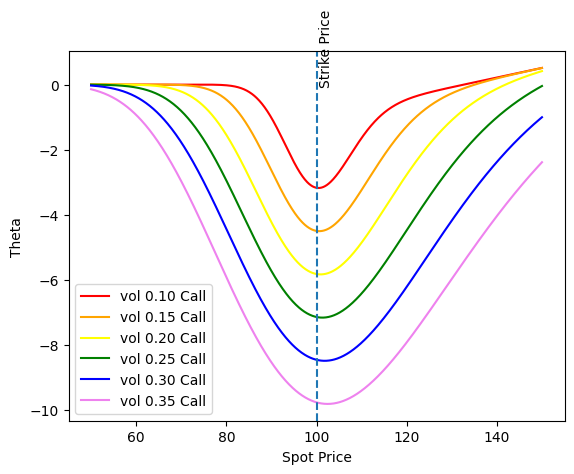

In [35]:
plot_call_theta_vol(K, r, q, tau, h_fo)

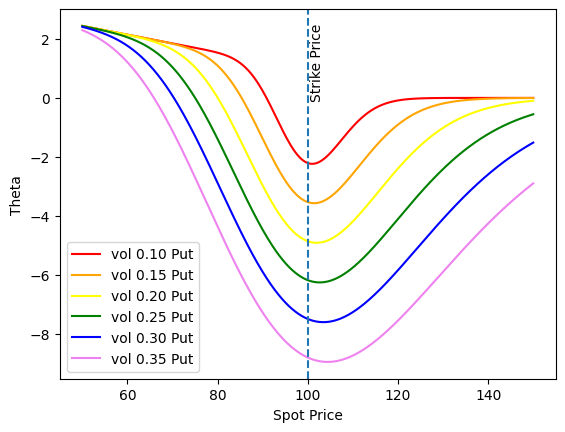

In [36]:
plot_put_theta_vol(K, r, q, tau, h_fo)

In [37]:
def plot_call_theta_tau(K, r, q, sigma, h):
    greeks_1_df = greek_theta_call(K, r, q, 1/12, sigma, h)
    greeks_2_df = greek_theta_call(K, r, q, 2/12, sigma, h)
    greeks_3_df = greek_theta_call(K, r, q, 3/12, sigma, h)
    greeks_4_df = greek_theta_call(K, r, q, 4/12, sigma, h)
    greeks_5_df = greek_theta_call(K, r, q, 5/12, sigma, h)
    greeks_6_df = greek_theta_call(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_1_df, color = 'red', label = '1 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_2_df, color = 'orange', label = '2 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_3_df, color = 'yellow', label = '3 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_4_df, color = 'green', label = '4 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_5_df, color = 'blue', label = '5 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_6_df, color = 'violet', label = '6 month to expire call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [38]:
def plot_put_theta_tau(K, r, q, sigma, h):
    greeks_1_df = greek_theta_put(K, r, q, 1/12, sigma, h)
    greeks_2_df = greek_theta_put(K, r, q, 2/12, sigma, h)
    greeks_3_df = greek_theta_put(K, r, q, 3/12, sigma, h)
    greeks_4_df = greek_theta_put(K, r, q, 4/12, sigma, h)
    greeks_5_df = greek_theta_put(K, r, q, 5/12, sigma, h)
    greeks_6_df = greek_theta_put(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_1_df, color = 'red', label = '1 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_2_df, color = 'orange', label = '2 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_3_df, color = 'yellow', label = '3 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_4_df, color = 'green', label = '4 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_5_df, color = 'blue', label = '5 month to expire put')
    sns.lineplot(x = 'Spot Price', y = 'Theta', data = greeks_6_df, color = 'violet', label = '6 month to expire put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

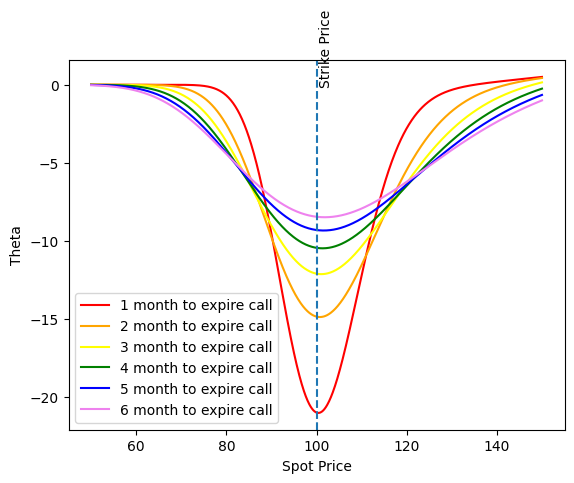

In [39]:
plot_call_theta_tau(K, r, q, sigma, h_fo)

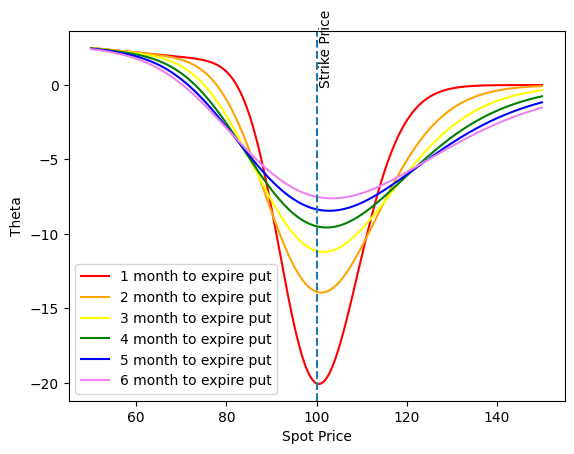

In [40]:
plot_put_theta_tau(K, r, q, sigma, h_fo)

In [41]:
def greek_vega_call(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau, sigma + h, epsilon = 0)
    bs_left_df = black_scholes(K, r, q, tau, sigma - h, epsilon = 0)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['call'],
        'V_right' : bs_right_df['call'],
        'V_left' : bs_left_df['call']
    })

    greeks_df.eval('Vega = (V_right - V_left)/ (@h * 2)', inplace = True)

    return greeks_df

In [42]:
def greek_vega_put(K, r, q, tau, sigma, h):
    bs_df = black_scholes(K, r, q, tau, sigma)
    bs_right_df = black_scholes(K, r, q, tau, sigma + h, epsilon = 0)
    bs_left_df = black_scholes(K, r, q, tau, sigma - h, epsilon = 0)

    greeks_df = pd.DataFrame({
        'Spot Price' : bs_df['S'],
        'V' : bs_df['put'],
        'V_right' : bs_right_df['put'],
        'V_left' : bs_left_df['put']
    })

    greeks_df.eval('Vega = (V_right - V_left)/ (@h * 2)', inplace = True)

    return greeks_df

In [43]:
def plot_call_vega_vol(K, r, q, tau, h):
    greek_1_df = greek_vega_call(K, r, q, tau, 0.10, h)
    greek_2_df = greek_vega_call(K, r, q, tau, 0.15, h)
    greek_3_df = greek_vega_call(K, r, q, tau, 0.20, h)
    greek_4_df = greek_vega_call(K, r, q, tau, 0.25, h)
    greek_5_df = greek_vega_call(K, r, q, tau, 0.30, h)
    greek_6_df = greek_vega_call(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_1_df, color = 'red', label = 'vol 0.10 Call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_2_df, color = 'orange', label = 'vol 0.15 Call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_4_df, color = 'green', label = 'vol 0.25 Call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_5_df, color = 'blue', label = 'vol 0.30 Call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_6_df, color = 'violet', label = 'vol 0.35 Call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [44]:
def plot_put_vega_vol(K, r, q, tau, h):
    greek_1_df = greek_vega_put(K, r, q, tau, 0.10, h)
    greek_2_df = greek_vega_put(K, r, q, tau, 0.15, h)
    greek_3_df = greek_vega_put(K, r, q, tau, 0.20, h)
    greek_4_df = greek_vega_put(K, r, q, tau, 0.25, h)
    greek_5_df = greek_vega_put(K, r, q, tau, 0.30, h)
    greek_6_df = greek_vega_put(K, r, q, tau, 0.35, h)

    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_1_df, color = 'red', label = 'vol 0.10 Put')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_2_df, color = 'orange', label = 'vol 0.15 Put')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_3_df, color = 'yellow', label = 'vol 0.20 Put')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_4_df, color = 'green', label = 'vol 0.25 Put')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_5_df, color = 'blue', label = 'vol 0.30 Put')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greek_6_df, color = 'violet', label = 'vol 0.35 Put')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

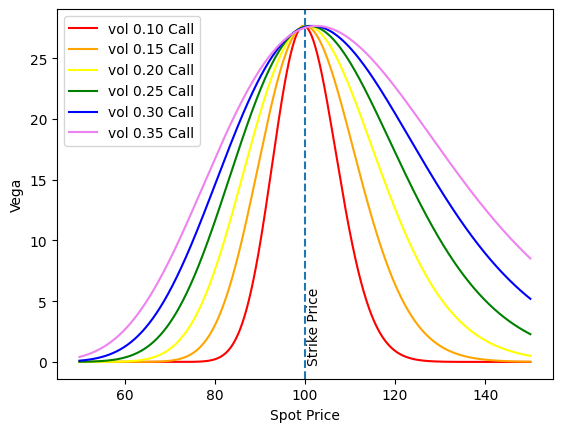

In [45]:
plot_call_vega_vol(K, r, q, tau, h_fo)

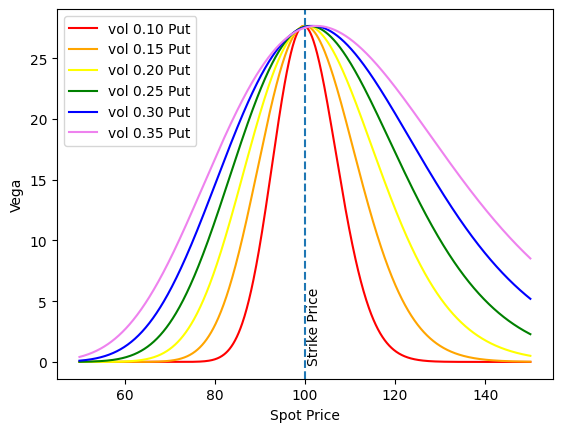

In [46]:
plot_put_vega_vol(K, r, q, tau, h_fo)

In [47]:
def plot_call_vega_tau(K, r, q, sigma, h):
    greeks_1_df = greek_vega_call(K, r, q, 1/12, sigma, h)
    greeks_2_df = greek_vega_call(K, r, q, 2/12, sigma, h)
    greeks_3_df = greek_vega_call(K, r, q, 3/12, sigma, h)
    greeks_4_df = greek_vega_call(K, r, q, 4/12, sigma, h)
    greeks_5_df = greek_vega_call(K, r, q, 5/12, sigma, h)
    greeks_6_df = greek_vega_call(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_1_df, color = 'red', label = '1 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_2_df, color = 'orange', label = '2 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_3_df, color = 'yellow', label = '3 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_4_df, color = 'green', label = '4 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_5_df, color = 'blue', label = '5 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_6_df, color = 'violet', label = '6 month to expire call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

In [48]:
def plot_put_vega_tau(K, r, q, sigma, h):
    greeks_1_df = greek_vega_put(K, r, q, 1/12, sigma, h)
    greeks_2_df = greek_vega_put(K, r, q, 2/12, sigma, h)
    greeks_3_df = greek_vega_put(K, r, q, 3/12, sigma, h)
    greeks_4_df = greek_vega_put(K, r, q, 4/12, sigma, h)
    greeks_5_df = greek_vega_put(K, r, q, 5/12, sigma, h)
    greeks_6_df = greek_vega_put(K, r, q, 6/12, sigma, h)

    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_1_df, color = 'red', label = '1 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_2_df, color = 'orange', label = '2 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_3_df, color = 'yellow', label = '3 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_4_df, color = 'green', label = '4 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_5_df, color = 'blue', label = '5 month to expire call')
    sns.lineplot(x = 'Spot Price', y = 'Vega', data = greeks_6_df, color = 'violet', label = '6 month to expire call')
    plt.axvline(K, ymin = 0, ymax = 1, linestyle = '--')
    plt.text(K + 0.5, 0, 'Strike Price',rotation=90)

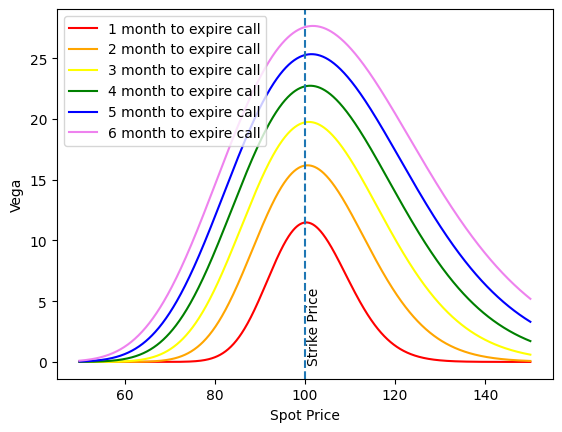

In [49]:
plot_call_vega_tau(K, r, q, sigma, h_fo)

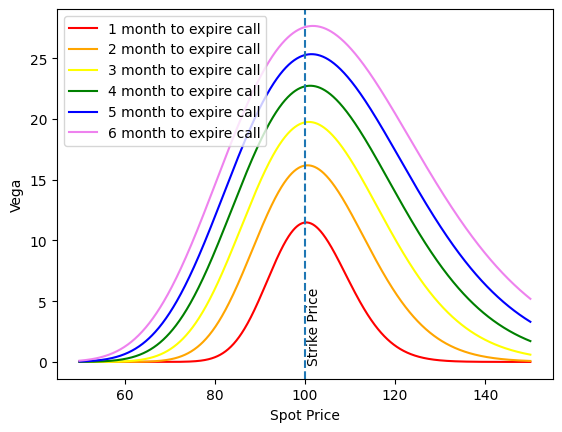

In [50]:
plot_put_vega_tau(K, r, q, sigma, h_fo)